In [30]:
#import pandas
import pandas as pd

In [31]:
#read in sample DF
df = pd.read_csv("insurance.csv")

In [32]:
#print head
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [33]:
#print data types
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [34]:
#shape, how many values
df.shape

(1338, 7)

In [35]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
#print unique age values
print(df['age'].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


In [37]:
#print unique kid values
print(df['children'].unique())

[0 1 3 2 5 4]


In [51]:
#Nominal cats
region_counts = df['region'].value_counts()
print(region_counts)

# Get region with most charges
top_region = region_counts.index[0]
print(top_region) 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
southeast


In [39]:
#round charges to two digits
print(df['charges'].round(2))

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: charges, Length: 1338, dtype: float64


In [40]:
#value counts on sex
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [41]:
#encode sex to a number to check correlations for object values
new_dictionary = {"sex": {"male":1, "female":0},
                 "smoker": {"yes":1, "no":0},
                 "region": {'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}}
new_df = df.replace(new_dictionary)
print(new_df.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       1  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520


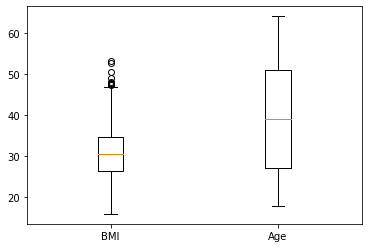

In [42]:
#box plot BMI and Age 
import matplotlib.pyplot as plt
plt.boxplot([new_df["bmi"], new_df["age"]], labels = ["BMI", "Age"]) 
plt.show()

In [43]:
print(new_df.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


In [44]:
#being a smoker is most correlated to the charges, age and bmi slightly correlated, no real corr to sex, region
new_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

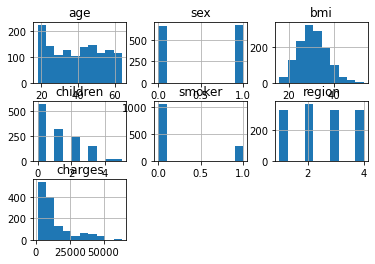

In [45]:
new_df.hist()

In [46]:
#women only
women_df = new_df[new_df['sex']== 0].copy()
men_df = new_df[new_df['sex']== 1].copy()
print(women_df.head())

   age  sex    bmi  children  smoker  region      charges
0   19    0  27.90         0       1       1  16884.92400
5   31    0  25.74         0       0       2   3756.62160
6   46    0  33.44         1       0       2   8240.58960
7   37    0  27.74         3       0       3   7281.50560
9   60    0  25.84         0       0       3  28923.13692


In [47]:
#notice diffences in correlations where all same sex, women, then men
women_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,NaN,0.097214,0.078500,-0.029199,0.002528,0.324575
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.097214,NaN,1.000000,0.022151,-0.058400,-0.105734,0.161419
children,0.078500,NaN,0.022151,1.000000,-0.025144,-0.026323,0.058492
smoker,-0.029199,NaN,-0.058400,-0.025144,1.000000,0.034990,0.746695
region,0.002528,NaN,-0.105734,-0.026323,0.034990,1.000000,0.039095
charges,0.324575,NaN,0.161419,0.058492,0.746695,0.039095,1.000000


In [48]:
men_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,NaN,0.123088,0.008690,-0.018589,-0.006900,0.282369
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.123088,NaN,1.000000,0.002385,0.050708,-0.207716,0.225847
children,0.008690,NaN,0.002385,1.000000,0.033369,-0.007037,0.074496
smoker,-0.018589,NaN,0.050708,0.033369,1.000000,-0.025979,0.816579
region,-0.006900,NaN,-0.207716,-0.007037,-0.025979,1.000000,-0.021013
charges,0.282369,NaN,0.225847,0.074496,0.816579,-0.021013,1.000000


In [49]:
#function to calculate insurance costs with inputs, where I already have the weights for each input
def calculate_insurance_cost(name, age, sex, bmi, num_of_children, smoker):
  estimated_cost = 250 * age - 128 * sex + 370 * bmi + 425 * num_of_children + 24000 * smoker - 12500
  print("The estimated insurance cost for " + name + " is " + str(estimated_cost) + " dollars.")
  return estimated_cost


In [50]:
insurance_cost = calculate_insurance_cost(name= "Magnolia", age=28, sex=0, bmi=18.0, num_of_children=0, smoker=0)

The estimated insurance cost for Magnolia is 1160.0 dollars.
